# EDA of the audio files

## Libraries

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

import librosa
import librosa.display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

seed = 42
tf.random.set_seed(seed)

In [2]:
print(f"Tensorflow datasets: {tfds.__version__}")
print(f"Tensorflow: {tf.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Tensorflow datasets: 4.2.0
Tensorflow: 2.4.1
Librosa: 0.8.0
Numpy: 1.19.5
Matplotlib: 3.4.1


## Tensorflow Dataset

I have created my own [Tensorflow dataset](https://www.tensorflow.org/datasets/overview) for this project following this [guide](https://www.tensorflow.org/datasets/add_dataset). The pump folder contains the details of this Tensorflow dataset. 

In [3]:
import pump

data_dir = "../dataset"

(train, test), info = tfds.load("pump", split=["train", "test"], data_dir=data_dir, with_info=True)

In [4]:
def print_plot(audio_sample, color):
    y = list(audio_sample)[0]["audio"].numpy() / 2**15
    sr = 16_000

    fig, ax = plt.subplots(1, 4, figsize=(24, 2))

    librosa.display.waveplot(y, sr=sr, ax=ax[0], color=color)
    ax[0].set(title=f"Waveplot")
    ax[0].set_ylim([-0.1, 0.1])

    S = np.abs(librosa.stft(y))
    D = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[1])
    ax[1].set(title=f"Linear-frequency power spectrogram")
    fig.colorbar(img, ax=ax[1], format='%+2.0f dB')

    img = librosa.display.specshow(D, y_axis='log', sr=sr, x_axis='time', ax=ax[2])
    ax[2].set(title='Log-frequency power spectrogram')
    fig.colorbar(img, ax=ax[2], format='%+2.0f dB')  

    M = librosa.feature.melspectrogram(S=S**2, sr=sr)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', sr=sr, fmax=8000, ax=ax[3])
    ax[3].set(title=f"Mel spectrogram")
    fig.colorbar(img, ax=ax[3], format='%+2.0f dB')

### Machine_id=00

audio audio/id audio/machine  \
0  [189, 213, -7, -96, 1, 287, 250, 124, 270, 319...  b'0816'         b'00'   
1  [-220, -367, -50, 259, 230, -273, -12, 309, 50...  b'0080'         b'00'   
2  [428, 503, 218, 129, 98, 98, 21, -121, -139, -...  b'0078'         b'00'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

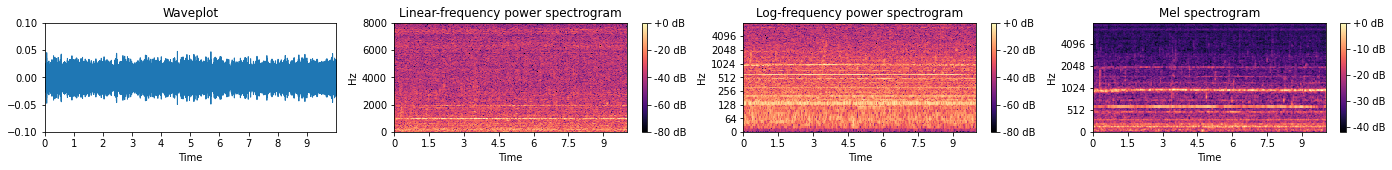

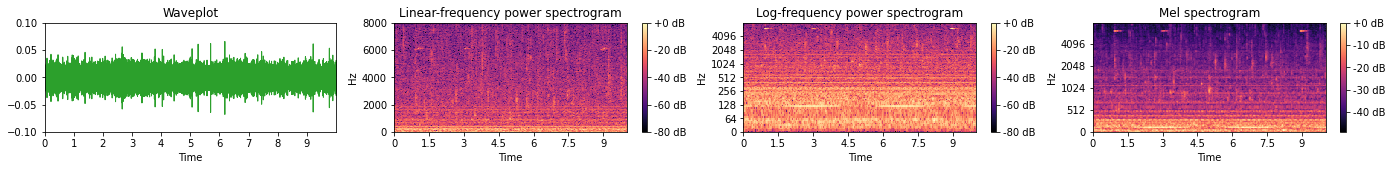

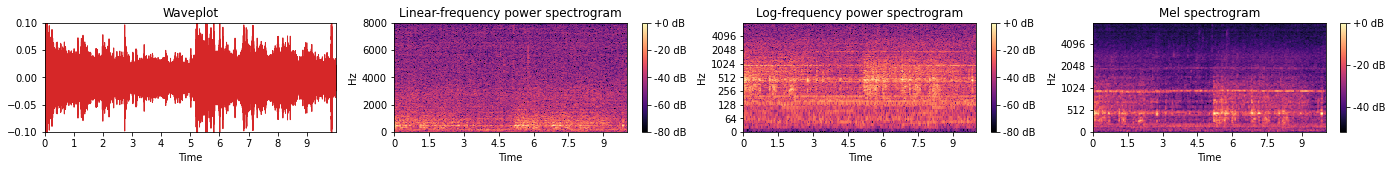

In [5]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0)  # Equivalent to []

machine_id = "00"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=02

audio audio/id audio/machine  \
0  [868, 933, 46, 196, -224, -14, 730, -449, -407...  b'0840'         b'02'   
1  [319, 371, 279, -68, 22, -180, -55, 14, 91, -1...  b'0071'         b'02'   
2  [-515, -295, -49, -27, -58, -343, -526, -629, ...  b'0015'         b'02'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

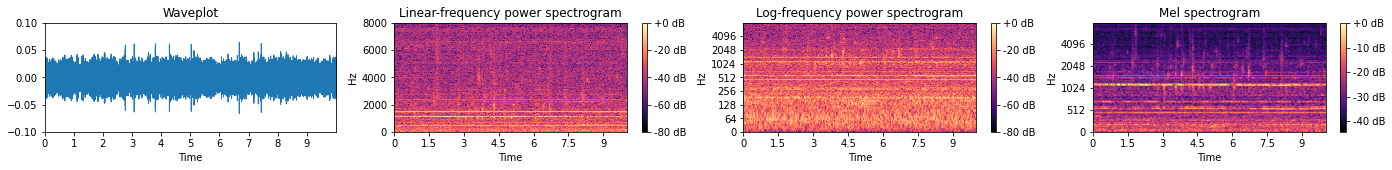

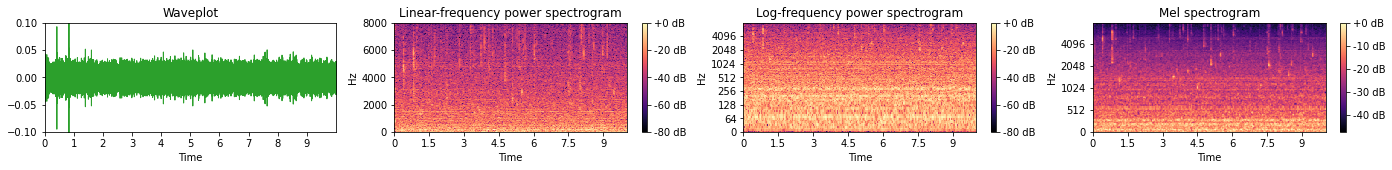

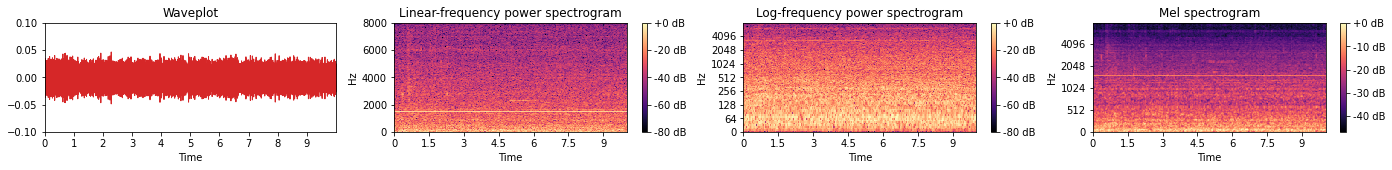

In [6]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "02"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=04

audio audio/id audio/machine  \
0  [102, -292, -119, 122, 185, 189, 206, 102, 56,...  b'0091'         b'04'   
1  [186, 277, -33, -75, -20, 172, 357, -87, -391,...  b'0087'         b'04'   
2  [308, 303, 450, 475, 135, -167, 438, 596, -104...  b'0099'         b'04'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

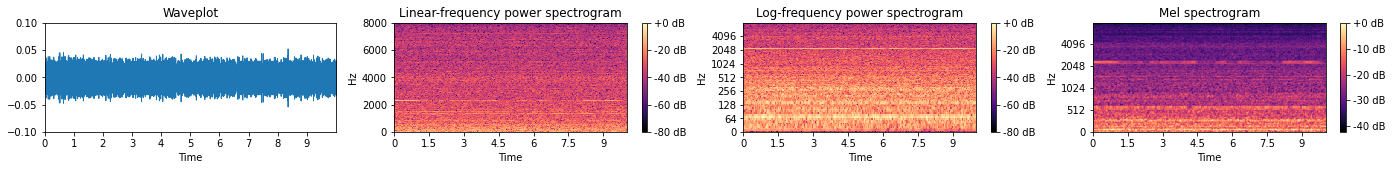

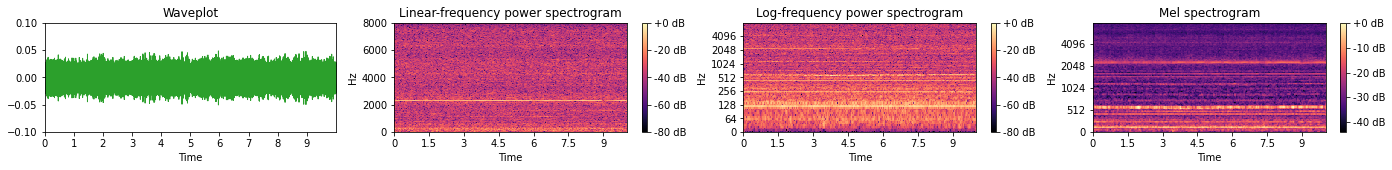

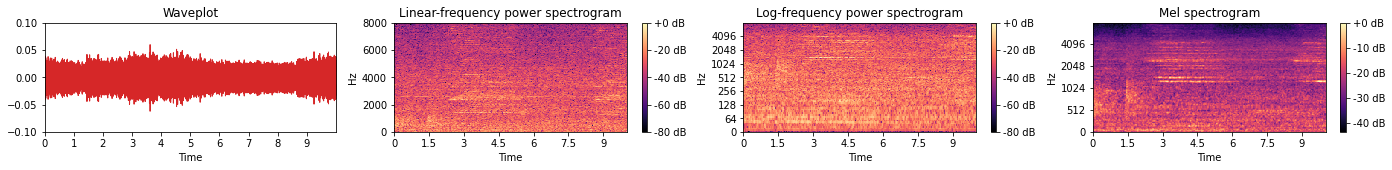

In [7]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "04"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 

### Machine_id=06

audio audio/id audio/machine  \
0  [-518, -401, -495, -473, -296, -409, -329, -44...  b'0341'         b'06'   
1  [156, 178, 215, 205, 150, 45, 156, 294, 292, 3...  b'0042'         b'06'   
2  [-132, 19, -64, -219, -280, -290, -448, -527, ...  b'0075'         b'06'   

   audio/split  label  
0            0      0  
1            1      0  
2            1      1

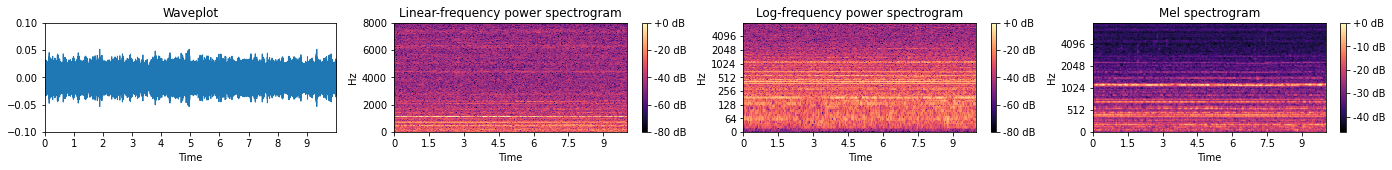

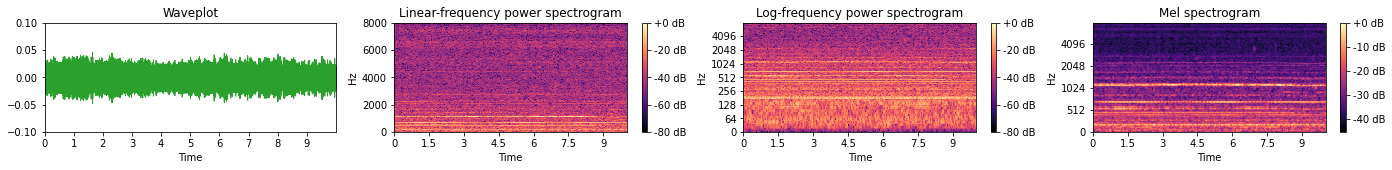

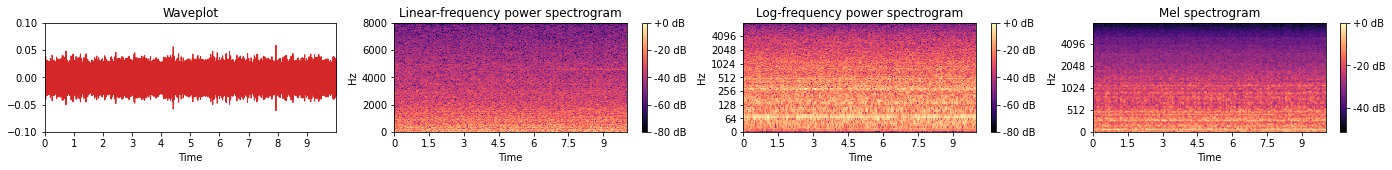

In [8]:
color = ["tab:blue", "tab:green", "tab:red"]
audios = train.concatenate(test)

audios_lst = audios.take(0) # Equivalent to []

machine_id = "06"
idx = 0

for split in [0,1]: #[train, test]
    for label in [0,1]: #[normal, anomaly]
        if split == 0 and label == 1:
            continue
        else:
            audio_sample = audios.filter(lambda x: (x["audio/machine"] == machine_id) & (x["audio/split"] == split) & (x["label"] == label)).shuffle(32).take(1)
            print_plot(audio_sample, color[idx])
            audios_lst = audios_lst.concatenate(audio_sample)
            idx += 1

tfds.as_dataframe(audios_lst, info) 